# Homework 1

## Harry Potter and the Prisoner of UPenn

In [14]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [15]:

gryffindor_tower = things.Location(
    "Gryffindor Tower",
    "You are in the Gryffindor Tower! Laughter echoes off the crimson walls as students swap tales of daring escapades!"
)
ollivanders = things.Location(
    "Ollivanders",
    "You are at the Ollivanders wand shop! Each wand seemingly waiting for the right wizard or witch to claim it.",
)
quidditch_stadium = things.Location(
    "Quidditch Stadium",
    "You are at the Quidditch Stadium! Brooms soar, cheers fill the air, and the golden Snitch darts around."
)
great_hall = things.Location(
    "Great hall",
    "You are at the Great Hall! Enchanted candles flicker above, illuminating long tables with a magical feast.",
)

gryffindor_tower.add_connection("north", ollivanders)
ollivanders.add_connection("east", quidditch_stadium)
gryffindor_tower.add_connection("up", great_hall)
ollivanders.add_connection("up", great_hall)
quidditch_stadium.add_connection("up", great_hall)

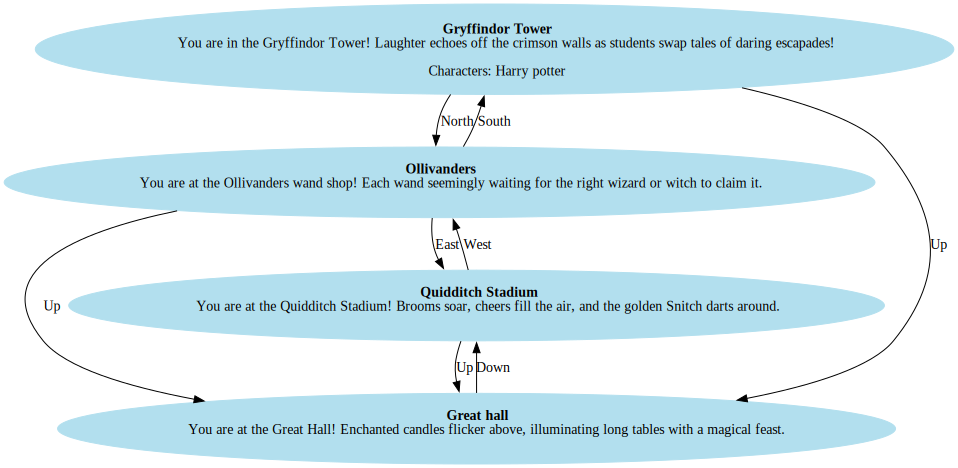

In [16]:
tempgame = games.Game(gryffindor_tower, things.Character(name="Harry Potter", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [17]:
# Put a luck potion at the gryffindor tower
luck_potion = things.Item(
    "luck potion",
    "A potion to increase your luck!",
    "a mysterious potion vial",
)
luck_potion.add_command_hint("get luck potion")
luck_potion.add_command_hint("sip luck potion")

gryffindor_tower.add_item(luck_potion)

# Put a wand at ollivanders
wand = things.Item(
    "wand",
    "a powerful wand",
    "this looks evenmore powerful than the Elder Wand!",
)
wand.set_property("is_weapon", True)
wand.add_command_hint("get wand")
ollivanders.add_item(wand)

# Put Nimbus 2000 broom at Quidditch Stadium
broom = things.Item(
    "broom",
    "The Nimbus 2000 broom",
    "This broom seems fast!",
)
broom.add_command_hint("get broom")
quidditch_stadium.add_item(broom)

## Characters

### Player

In [18]:
harry_potter = things.Character(
    name="Harry Potter",
    description="You are a 'not so lucky' Harry Potter.",
    persona="Revenge is what I seek!",
)
harry_potter.set_property("is_unlucky", True)

### Non-Player Characters (NPCs)

In [19]:
voldemort = things.Character(
    name="Voldemort",
    description="I'm Voldemort, the wizarding world's least likely candidate for a nose job, on a quest for immortality and an unfortunate allergy to Harry Potter.",
    persona="",
)

great_hall.add_character(voldemort)

## Actions

In [20]:
from text_adventure_games.things.items import Item

class Drink_Potion(actions.Action):
    ACTION_NAME = "sip luck potion"
    ACTION_DESCRIPTION = "sip luck potion"
    ACTION_ALIASES = ["sip"]
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.luck_potion = luck_potion
        

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have potion in their inventory
        """
        if not self.character.is_in_inventory(self.luck_potion):
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * Removes the badluck
        """
        self.character.set_property("is_unlucky", False)
        description = "You've sipped the Luck Potion! Farewell, misfortune – it's been magically erased."
        self.parser.ok(description)


In [21]:
class Attack_Voldemort(actions.Action):
    ACTION_NAME = "Avada Kedavra"
    ACTION_DESCRIPTION = "Harry attacked Voldemort!"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character: things.Character = self.parser.get_character(command)
        self.wand: things.Item = self.parser.match_item(
                "wand", self.parser.get_items_in_scope(self.character)
            )
        self.voldemort = self.parser.get_character("voldemort")

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as the Voldemort
        * The the character must have wand
        * The the character must be lucky
        """
        if not self.character.location.here(self.voldemort):
            description = "The character must be in the same location as Voldemort"
            self.parser.fail(description)
            return False
        if not self.character.is_in_inventory(self.wand):
            return False
        return True

    def apply_effects(self):
        """
        The character wins/loses
        """
        # TODO - your code here
        if self.character.get_property("is_unlucky"):
            print("You got defeated by Lord Voldemort, 'bad luck Harry.'")
            self.character.set_property("is_lost", True)
        else:
            print("You have defeated Lord Voldemort Harry! You Won!")
            self.character.set_property("is_won", True)


## Blocks

In [22]:
class Fly_Block(blocks.Block):

    def __init__(self, harry: things.Character):
        super().__init__(
            "Harry tries to fly!",
            "Harry tries to fly! but has no wings (or red bull)"
        )
        self.harry = harry

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * Character cannot fly without broom
        if self.harry:
            if not self.harry.is_in_inventory(broom):
                return True
        return False


In [23]:
# TODO Add blocks to location to:

fly_block = Fly_Block(harry_potter)
quidditch_stadium.add_block("up", fly_block)
ollivanders.add_block("up", fly_block)
gryffindor_tower.add_block("up", fly_block)

## Play Harry Potter and the Prisoner of UPenn

In [24]:
class HarryPotterGame(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """ 
        """
        for name, character in self.characters.items():
            
            if character.get_property("is_lost"):
                if(character.name == "Harry Potter"):
                    return True
            elif character.get_property("is_won"):
                if(character.name == "Harry Potter"):
                    return True
        return False

In [25]:

characters = [harry_potter, voldemort]
custom_actions = [Drink_Potion, Attack_Voldemort]

# The Game
game = HarryPotterGame(gryffindor_tower, harry_potter, characters=characters, custom_actions=custom_actions)

In [26]:
game.game_loop()

You are in the Gryffindor Tower! Laughter echoes off the crimson walls as
students swap tales of daring escapades!
Exits:
North to Ollivanders
Up to Great hall

You see:
 * A potion to increase your luck!
        get luck potion
        sip luck potion


Harry Potter got the luck potion.
You've sipped the Luck Potion! Farewell, misfortune – it's been magically
erased.
You are at the Ollivanders wand shop! Each wand seemingly waiting for the right
wizard or witch to claim it.
Exits:
South to Gryffindor Tower
East to Quidditch Stadium
Up to Great hall

You see:
 * a powerful wand
        get wand


Harry Potter got the wand.
You are at the Quidditch Stadium! Brooms soar, cheers fill the air, and the
golden Snitch darts around.
Exits:
West to Ollivanders
Up to Great hall

You see:
 * The Nimbus 2000 broom
        get broom


Harry Potter got the broom.
You are at the Great Hall! Enchanted candles flicker above, illuminating long
tables with a magical feast.
Exits:
Down to Quidditch Stadiu

In [ ]:
from text_adventure_games.things.items import Item

class Drink_Potion(actions.Action):
    ACTION_NAME = "sip luck potion"
    ACTION_DESCRIPTION = "sip luck potion"
    ACTION_ALIASES = ["sip"]
    
    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.luck_potion = luck_potion
        

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have potion in their inventory
        """
        if not self.character.is_in_inventory(self.luck_potion):
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * Removes the badluck
        """
        self.character.set_property("is_unlucky", False)
        description = "You've sipped the Luck Potion! Farewell, misfortune – it's been magically erased."
        self.parser.ok(description)
